# Colab Init

In [162]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'CS6476-CV/2A Linear image processing'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [163]:
import numpy as np
import cv2
import os
from skimage.util import random_noise

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


%matplotlib inline
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
DRIVE_PATH = "/content/drive/My Drive/Projects"
COURSE_PATH = os.path.join(DRIVE_PATH, FOLDERNAME)
DATA_DIR = os.path.join(COURSE_PATH, "data")

# L2 Filtering

## Load an color image in grayscale


In [165]:
img = cv2.imread(DATA_DIR + '/Saturn.jpg', cv2.IMREAD_GRAYSCALE)

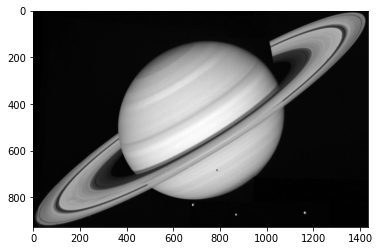

In [166]:
plt.imshow(img, cmap='gray')
plt.show()

## Add noise 

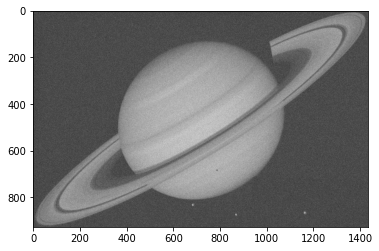

In [167]:
H, W = img.shape 
noise_sigma = 25
noise = np.random.randn(H, W) * 25
noise_img = img + noise
plt.imshow(noise_img, cmap='gray')
plt.show()

## Remove noise with Gaussian Filter

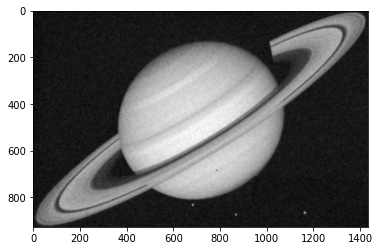

In [168]:
filter_size = 7
filter_sigma = 5
filter = cv2.GaussianBlur(noise_img, (filter_size, filter_size), filter_sigma)
plt.imshow(filter, cmap='gray')
plt.show()

# L3 Linearity and convolution	

## Boundry Issues

### Load Color image

In [169]:
img = cv2.imread(DATA_DIR + '/fall-leaves.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

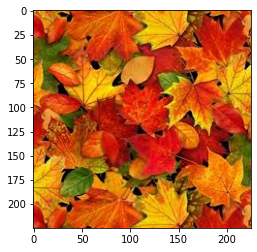

In [170]:
plt.imshow(img)
plt.show()

### Border types

In [171]:
# https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#gaussianblur
border_type = [cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, 
               cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP,
               cv2.BORDER_CONSTANT, cv2.BORDER_DEFAULT]

### Test the borders

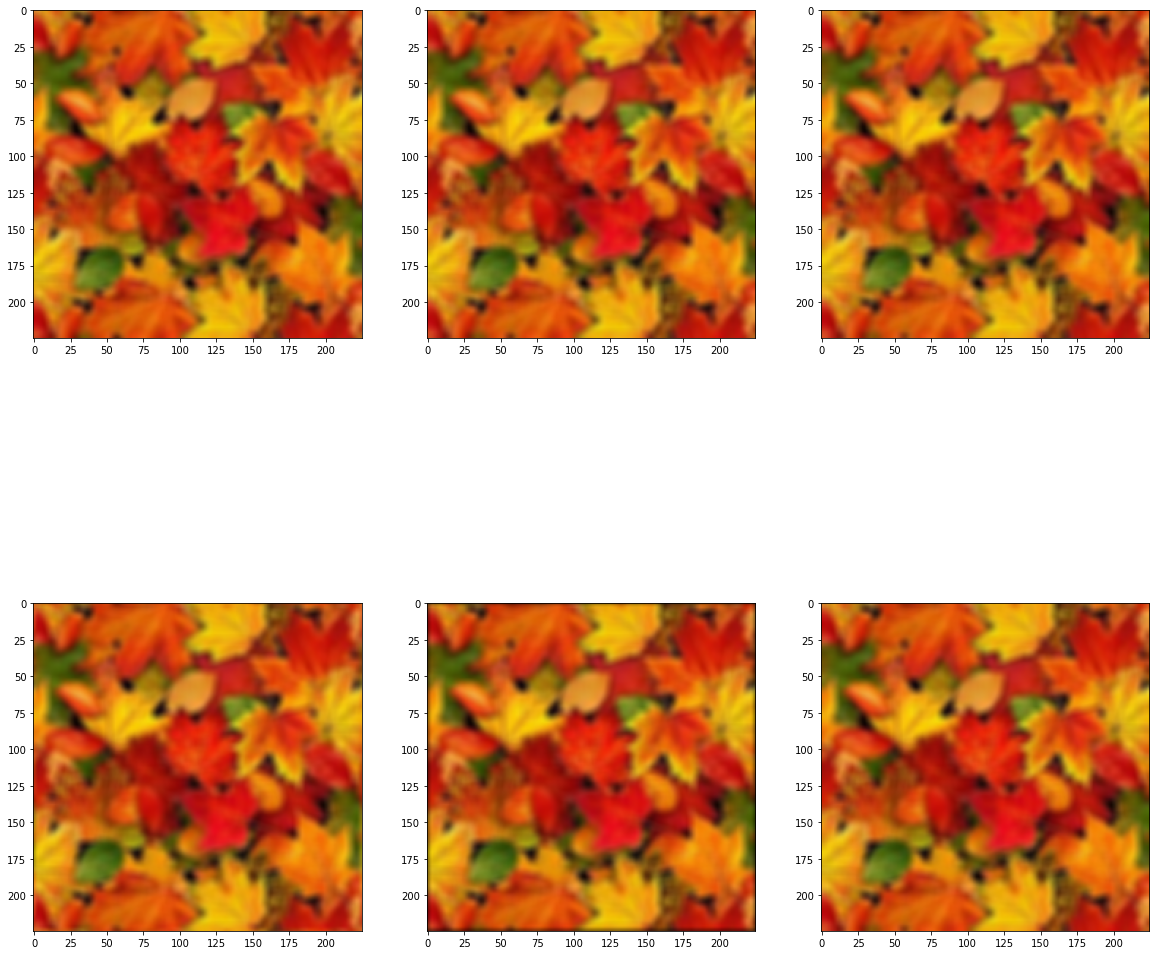

In [172]:


rows = 2
cols = 3
border = 0
f, axarr = plt.subplots(rows,cols, figsize=(20,20))
filter_size = 7
filter_sigma = 3
for i in range(rows):
  for j in range(cols):
    filtered_image = cv2.GaussianBlur(img, (filter_size, filter_size), filter_sigma, borderType=border_type[border])
    axarr[i,j].patch.set_edgecolor('white')  
    axarr[i,j].patch.set_linewidth('10')  
    axarr[i,j].imshow(filtered_image)
    border += 1

plt.show()

## Median Filter

### Load image

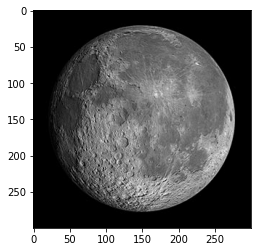

In [173]:
img = cv2.imread(DATA_DIR + '/moon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Add s&p noise

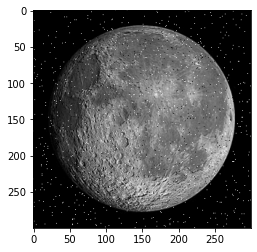

In [174]:
noise_img = random_noise(img, mode='s&p',amount=0.02)
plt.imshow(noise_img, cmap='gray')
plt.show()

### Remove noise with median filter

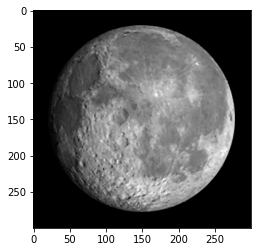

In [175]:
filtered_img = cv2.medianBlur(noise_img.astype('float32'), ksize=3)
plt.imshow(filtered_img, cmap='gray')
plt.show()

# L4 Filters as templates

## Find template 1D

### Create signal and templates

In [176]:
s = np.array([-1, 0, 0, 1, 1, 1, 0, -1, -1, 0, 1, 0, 0, -1], dtype=np.float32)
t1 = np.array([1, 1, 0], dtype=np.float32)
t2 = np.array([0, -1, -1, 0], dtype=np.float32)
t3 = np.array([1, 1, 1, 0, 0], dtype=np.float32)

### Find template 1D function



In [177]:
def find_template_1d(template, signal):
  index = cv2.matchTemplate(template, signal, cv2.TM_CCORR_NORMED)
  print('first index of the template: {}'.format(np.argmax(index)))
  return index

In [178]:
results = find_template_1d(t1, s)
results = find_template_1d(t2, s)
results = find_template_1d(t3, s)

first index of the template: 4
first index of the template: 6
first index of the template: 3


## Find template 2D

### Load image and show

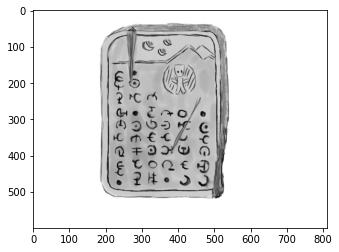

In [179]:
img = cv2.imread(DATA_DIR + '/glyphs.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Take a single glyph

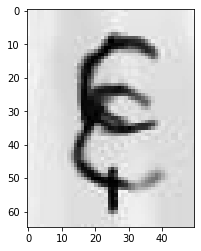

In [180]:
glyph = img[160:225, 210:260]
plt.imshow(glyph, cmap='gray')
plt.show()

### Find template 2D function



In [181]:
def find_template_2d(template, image):
  h, w = template.shape
  res = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  print('top left of the template: {}'.format(top_left))
  print('bottom right of the template: {}'.format(bottom_right))
  return index, top_left, bottom_right

In [182]:
index, top_left, bottom_right = find_template_2d(glyph, img)

top left of the template: (210, 160)
bottom right of the template: (260, 225)


([], <a list of 0 Text major ticklabel objects>)

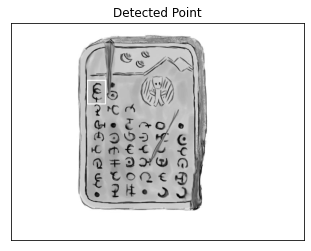

In [183]:
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.imshow(img,cmap = 'gray')
plt.title('Detected Point')
plt.xticks([])
plt.yticks([])

# L5 Edge detection: Gradients

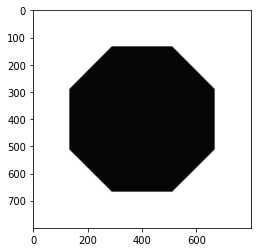

In [184]:
img = cv2.imread(DATA_DIR + '/octogon.png', cv2.IMREAD_GRAYSCALE)
img = np.array(img, dtype=np.float64) / 255.
plt.imshow(img, cmap='gray')
plt.show()

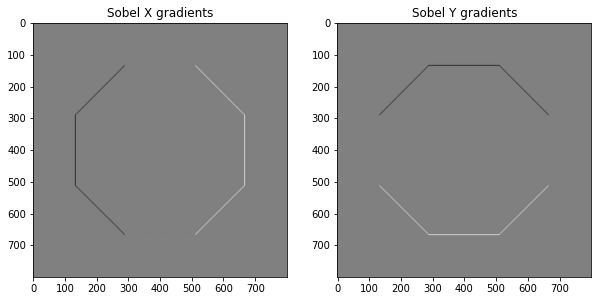

In [185]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

f, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow((sobelx + 4) / 8, cmap='gray')
axarr[0].title.set_text('Sobel X gradients')

axarr[1].imshow((sobely + 4) / 8, cmap='gray')
axarr[1].title.set_text('Sobel Y gradients')